# November ??th, 2021 (register N162)

**Motivation**: ?? <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')
%matplotlib inline

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.fourier import *
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
mice = Mice(Config(256, 0, 100), full_load=True, load_parcel=True, load_allen=True)

ROI lookup not found, time to run organize_func() . . .

combine metadata not found, time to run cat_data() . . .

In [3]:
# mice.parcel.fit_parcel(True)

[PROGRESS] fit columnar: initiated

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


[PROGRESS] kmeans fit: done

[PROGRESS] save 2D 10um: done

[PROGRESS] 2d --> 3d: done

[PROGRESS] fill gaps: done

[PROGRESS] save 3D 10um: done

[PROGRESS] downsample: done

num regions,    left: 768,  right: 768
region id diff,         r - l:  Counter({768: 768})

[PROGRESS] fit columnar: done

[PROGRESS] 'cortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'cortex-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'subcortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'subcortex-l_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'subcortex-r_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'regions-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'regions-cortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'nonzero-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'region-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'region-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'region-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'shape_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'shape_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] 'shape_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*0/parcellation

[PROGRESS] save results: done.

In [3]:
from register.register import *
reg = Register(mice)

In [32]:
kwargs = {
    'types': ['SyN', 'ElasticSyN'],
    'grads': [0.15, 0.20, 0.25, 0.28, 0.3, 0.31, 0.32, 0.34, 0.35, 0.37, 0.38, 0.39, 0.40, 0.5, 0.9],
    'syn_bins': [64, 32, 16],
    'aff_bins': [13, 20, 32],
    'aff_rates': [0.2, 0.6, 0.8],
    'aff_metric': 'mattes',
    'syn_metric': 'mattes',
    'mi_q': 0.5,
    'n_seeds': 10,
}
kwargs

{
    'types': ['SyN', 'ElasticSyN'],
    'grads': [
        0.15,
        0.2,
        0.25,
        0.28,
        0.3,
        0.31,
        0.32,
        0.34,
        0.35,
        0.37,
        0.38,
        0.39,
        0.4,
        0.5,
        0.9
    ],
    'syn_bins': [64, 32, 16],
    'aff_bins': [13, 20, 32],
    'aff_rates': [0.2, 0.6, 0.8],
    'aff_metric': 'mattes',
    'syn_metric': 'mattes',
    'mi_q': 0.5,
    'n_seeds': 10
}

In [69]:
reg.set_mode('bold')
reg.mi_base = None

In [70]:
key = 'sub-SLC09_ses-2'
indiv = mice.T1w[key].load_ants()
indiv *= mice.mask3d[key].load_ants()
indiv = reg._prepare(indiv)

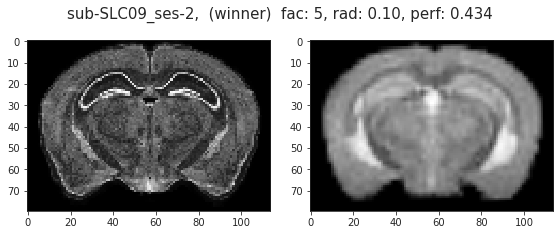

In [ ]:
results = reg.fit_register(
    name=key,
    moving=indiv,
    fixed=reg.nissl,
    save_results=True,
    **kwargs
)

In [ ]:
save_obj(results['df'], f"fit_{key}_{now()}", tmp_dir, 'df')

### --- continue from here

In [61]:
df = results['df'].copy()

params = {
    'seed': 9,
    'type': 'ElasticSyN', # 'SyN', #
    'grad': 0.28,
    'syn_bin': 64,
    'aff_bin': 13,
    'aff_rate': 0.6,
}
cond = functools.reduce(
    lambda x, y: x & y,
    [df[k] == v for k, v in params.items()],
)

df_sub_main = df.loc[cond]
df_sub_main

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score
209979,9,ElasticSyN,0.28,64,13,0.6,mi,0.515712
209980,9,ElasticSyN,0.28,64,13,0.6,ovp_MOp,0.990663
209981,9,ElasticSyN,0.28,64,13,0.6,sym_MOp,0.972376
209982,9,ElasticSyN,0.28,64,13,0.6,ovp_MOs,0.985205
209983,9,ElasticSyN,0.28,64,13,0.6,sym_MOs,0.991334
209984,9,ElasticSyN,0.28,64,13,0.6,ovp_SS,0.997000
209985,9,ElasticSyN,0.28,64,13,0.6,sym_SS,0.988663
209986,9,ElasticSyN,0.28,64,13,0.6,ovp_VISC,0.995708
209987,9,ElasticSyN,0.28,64,13,0.6,sym_VISC,0.925620
209988,9,ElasticSyN,0.28,64,13,0.6,ovp_VIS,0.999121


In [62]:
results['perf']

0.9776080373610695

In [63]:
_df = df.loc[df['metric'] == 'sym']
_df.iloc[[_df['score'].argmax()]]

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score
164104,7,ElasticSyN,0.15,64,13,0.8,sym,0.980453


In [64]:
params = dict(_df.iloc[_df['score'].argmax()])
params.pop('metric')
params.pop('score')

cond = functools.reduce(
    lambda x, y: x & y,
    [df[k] == v for k, v in params.items()],
)
df_sub = df.loc[cond]
df_sub

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score
164079,7,ElasticSyN,0.15,64,13,0.8,mi,0.507998
164080,7,ElasticSyN,0.15,64,13,0.8,ovp_MOp,0.987109
164081,7,ElasticSyN,0.15,64,13,0.8,sym_MOp,0.956757
164082,7,ElasticSyN,0.15,64,13,0.8,ovp_MOs,0.986383
164083,7,ElasticSyN,0.15,64,13,0.8,sym_MOs,0.988156
164084,7,ElasticSyN,0.15,64,13,0.8,ovp_SS,0.996171
164085,7,ElasticSyN,0.15,64,13,0.8,sym_SS,0.998234
164086,7,ElasticSyN,0.15,64,13,0.8,ovp_VISC,0.995798
164087,7,ElasticSyN,0.15,64,13,0.8,sym_VISC,0.904000
164088,7,ElasticSyN,0.15,64,13,0.8,ovp_VIS,0.996613


[<matplotlib.lines.Line2D object at 0x7f702074d850>]

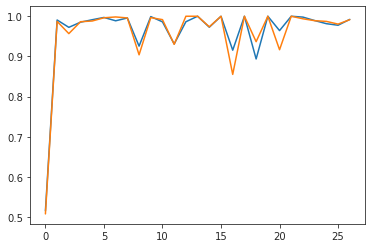

In [65]:
plt.plot(df_sub_main['score'].values)
plt.plot(df_sub['score'].values)

<AxesSubplot:xlabel='score', ylabel='Count'>

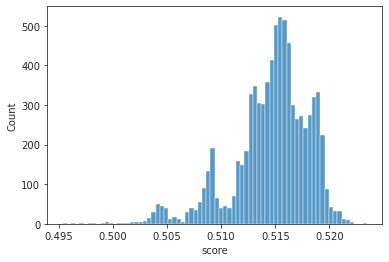

In [66]:
sns.histplot(df.loc[df['metric'] == 'mi', 'score'])

<AxesSubplot:xlabel='score', ylabel='Count'>

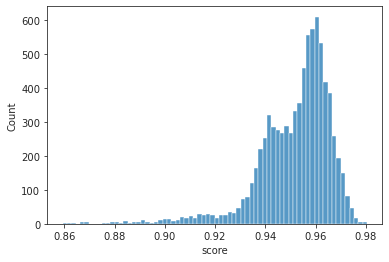

In [67]:
sns.histplot(df.loc[df['metric'] == 'sym', 'score'])

<AxesSubplot:>

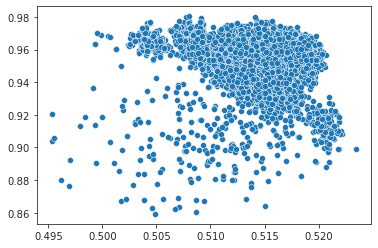

In [68]:
sns.scatterplot(
    x=df.loc[df['metric'] == 'mi', 'score'].values,
    y=df.loc[df['metric'] == 'sym', 'score'].values,
)

## Kaba continues

In [5]:
self = reg

In [6]:
tx, tx_aff = self.load_tx(self.in_house_name)

In [7]:
tx

[
    '/home/hadi/Documents/Ca-fMRI/processed/transforms/Symmetric_N162_space-CCF3d_ants-inv.mat',
    '/home/hadi/Documents/Ca-fMRI/processed/transforms/Symmetric_N162_space-CCF3d_ants-inv.nii.gz'
]

In [8]:
tx_aff

ANTsTransform
         Type       : AffineTransform
         Dimension  : 3
         Precision  : float

In [9]:
affined = tx_aff.apply_to_image(
    image=self.in_house,
    reference=self.nissl,
    interpolation='linear',
)
_ = self._apply_tx_obj2lps(
    name=self.in_house_name,
    moving=affined,
    moving_orig=self.in_house,
    tx_aff=tx_aff,
    tx=tx,
    use_mm=True,
    save_results=True,
)